# Trivago Case Study

## [Task1](#t1)

Have a look at the data included in the marketing campaigns dataset and import it into a tool of your choice for analysis and visualization. The data contains weekly information about different online marketing campaigns in one market.


[a)  Give an overview of the development of the entire market and the different campaigns. Please prepare 3-5 charts and summarize the most important findings.](#a)



[b) How would you assess the development of the quality of traffic, e.g. in terms of revenue per visitor. How is the overall development and how does each campaign evolve?](#b)



[c)  You are talking with the responsible business developer for the market who wants to spend an additional 250€ per week from week 31 onwards. Please help him out with the following questions:](#c)

* What is your advice in which campaign to invest and why?
* How do you expect this to impact the overall performance in the market from week 31 onwards?

## [Task2](#t2)

From our server logs, you can access the raw session data, that contains information about single visits to our website (= sessions). A clickout is logged whenever a user clicks on a hotel and is redirected to the booking page. The booking field is binary and indicates if a hotel booking was logged after one of the clickouts. Have a look at the data and check if there is any connection between the booking data and other given information. Feel free to formulate hypothesis based on your findings.

# Data Wrangling

* Collect
* Assess
* Clean

In [1]:
# First, load all the required libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Load the datasets
market_campaign = pd.read_csv('marketing_campaigns.csv',sep=';')

In [3]:
# Overlook
market_campaign.head()

,Week,Campaign,Visits,Revenue,Cost
0,1,Aldebaran,27,2.269511,3.763627
1,2,Aldebaran,64,10.820403,15.322613
2,3,Aldebaran,80,7.132998,10.753533
3,4,Aldebaran,93,11.085813,16.906191
4,5,Aldebaran,120,14.282481,21.446570


In [4]:
# The distribution of numerical columns
market_campaign.describe()

,Week,Visits,Revenue,Cost
count,91.000000,91.000000,91.000000,91.000000
mean,15.659341,213.802198,236.742528,241.536611
std,8.787895,128.068317,133.992466,136.031595
min,1.000000,27.000000,2.269511,3.763627
25%,8.000000,144.000000,122.557064,128.521299
50%,16.000000,158.000000,241.206336,235.321800
75%,23.000000,233.000000,357.412673,348.419153
max,30.000000,613.000000,463.249265,507.521951


In [5]:
# Then the categorical column
market_campaign.Campaign.describe()

count             91
unique             3
top       Cottington
freq              31
Name: Campaign, dtype: object

### So there are three different campaigns

In [6]:
# See the structure
market_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
Week        91 non-null int64
Campaign    91 non-null object
Visits      91 non-null int64
Revenue     91 non-null float64
Cost        91 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.6+ KB


### Since the dataset is not big, I'll check the quality of data in person

In [7]:
# Check the quality manually
from IPython.display import display
pd.options.display.max_rows = None

market_campaign

,Week,Campaign,Visits,Revenue,Cost
0,1,Aldebaran,27,2.269511,3.763627
1,2,Aldebaran,64,10.820403,15.322613
2,3,Aldebaran,80,7.132998,10.753533
3,4,Aldebaran,93,11.085813,16.906191
4,5,Aldebaran,120,14.282481,21.446570
5,6,Aldebaran,130,19.430408,27.218662
6,7,Aldebaran,146,28.630596,39.055805
7,8,Aldebaran,173,22.414567,29.490868
8,9,Aldebaran,170,32.721111,42.533055
9,10,Aldebaran,218,49.718208,63.436358


### I saw there is one duplicated record. Therefore, I dropped it here.

In [8]:
# Drop duplicates
market_campaign = market_campaign.drop_duplicates()
# Check the dimension
market_campaign.shape

(90, 5)

### I'll split dataset into three campaigns which will be handy later

In [9]:
#Split the dataset into three campaigns
market_campaign_Aldebaran = market_campaign.loc[market_campaign.Campaign=='Aldebaran']
market_campaign_Bartledan = market_campaign.loc[market_campaign.Campaign=='Bartledan']
market_campaign_Cottington = market_campaign.loc[market_campaign.Campaign=='Cottington']

# <a id="t1">Task 1</a>

## <a id="a">a) Give an overview of the development of the entire market and the different campaigns. Please prepare 3-5 charts and summarize the most important findings.</a>

In [10]:
# Group by week to see the overall development of the entire market
market_campaign_all = market_campaign.groupby('Week').sum()
market_campaign_all

,Visits,Revenue,Cost
Week,,,
1,304,423.441204,378.274486
2,319,421.962894,405.459197
3,327,428.013174,389.306516
4,363,452.385333,426.972462
5,381,453.793527,443.318002
6,401,483.696700,471.449257
7,421,515.065944,506.328105
8,456,510.271061,512.872938
9,470,571.185459,583.477616


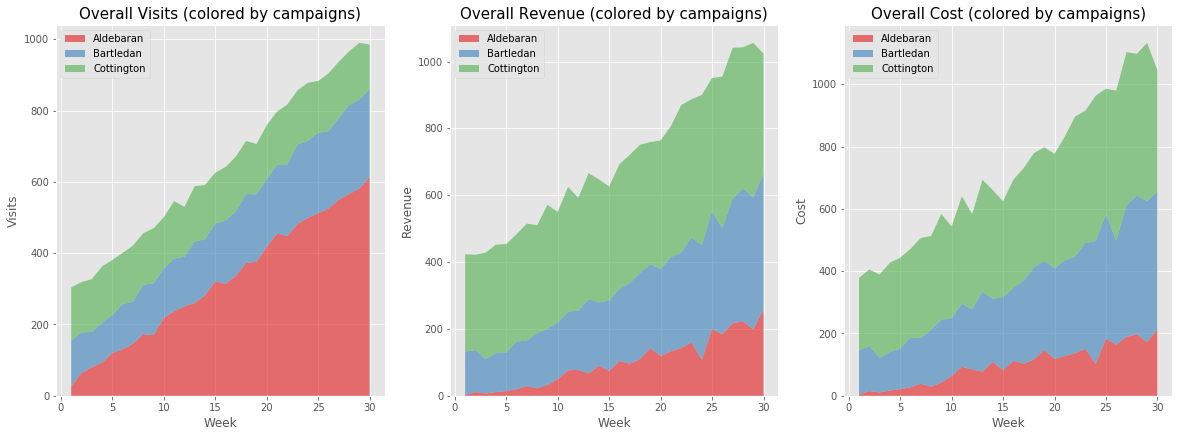

In [11]:
f, axs = plt.subplots(figsize=(20,15))
pal = sns.color_palette("Set1")

plt.subplot(234)

x = range(1,31)
y = [np.array(market_campaign_Aldebaran.Visits), np.array(market_campaign_Bartledan.Visits)
     , np.array(market_campaign_Cottington.Visits)]

ax1 = plt.stackplot(x, y, labels=['Aldebaran','Bartledan','Cottington'], colors=pal, alpha=0.6)
ax1 = plt.legend(loc='upper left')
ax1 = plt.xlabel('Week', fontsize=12)
ax1 = plt.ylabel('Visits', fontsize=12)
ax1 = plt.title('Overall Visits (colored by campaigns)', fontsize=15)

plt.subplot(235)

y = [np.array(market_campaign_Aldebaran.Revenue), np.array(market_campaign_Bartledan.Revenue)
     , np.array(market_campaign_Cottington.Revenue)]
ax1 = plt.stackplot(x, y, labels=['Aldebaran','Bartledan','Cottington'], colors=pal, alpha=0.6)
ax1 = plt.legend(loc='upper left')
ax1 = plt.xlabel('Week', fontsize=12)
ax1 = plt.ylabel('Revenue', fontsize=12)
ax1 = plt.title('Overall Revenue (colored by campaigns)', fontsize=15)

plt.subplot(236)

y = [np.array(market_campaign_Aldebaran.Cost), np.array(market_campaign_Bartledan.Cost)
     , np.array(market_campaign_Cottington.Cost)]
ax1 = plt.stackplot(x, y, labels=['Aldebaran','Bartledan','Cottington'], colors=pal, alpha=0.6)
ax1 = plt.legend(loc='upper left')
ax1 = plt.xlabel('Week', fontsize=12)
ax1 = plt.ylabel('Cost', fontsize=12)
ax1 = plt.title('Overall Cost (colored by campaigns)', fontsize=15)

We can see that the overall of visits, revenue, and cost are all growing, while the proportion of each campaign differs. However, the most eye-catching phenomenon to me is the index of Aldebaran campaign.   

**It seems that Aldebaran campaign has:**
* Comparatively significant growth in three index
* The most significant growth in the visits
* Rather low growth in the revenue and cost, compared to that of the amount of visit

**Moreover, I assume the revenue here indicates income instead of profit. Therefore, I'll calculate the profit and plot it in the following part.**

Let's dig deeper in the growth of visits of each campaign

In [12]:
market_campaign['Profit'] = market_campaign['Revenue'] - market_campaign['Cost']

#Split the dataset into three campaigns
market_campaign_Aldebaran = market_campaign.loc[market_campaign.Campaign=='Aldebaran']
market_campaign_Bartledan = market_campaign.loc[market_campaign.Campaign=='Bartledan']
market_campaign_Cottington = market_campaign.loc[market_campaign.Campaign=='Cottington']

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


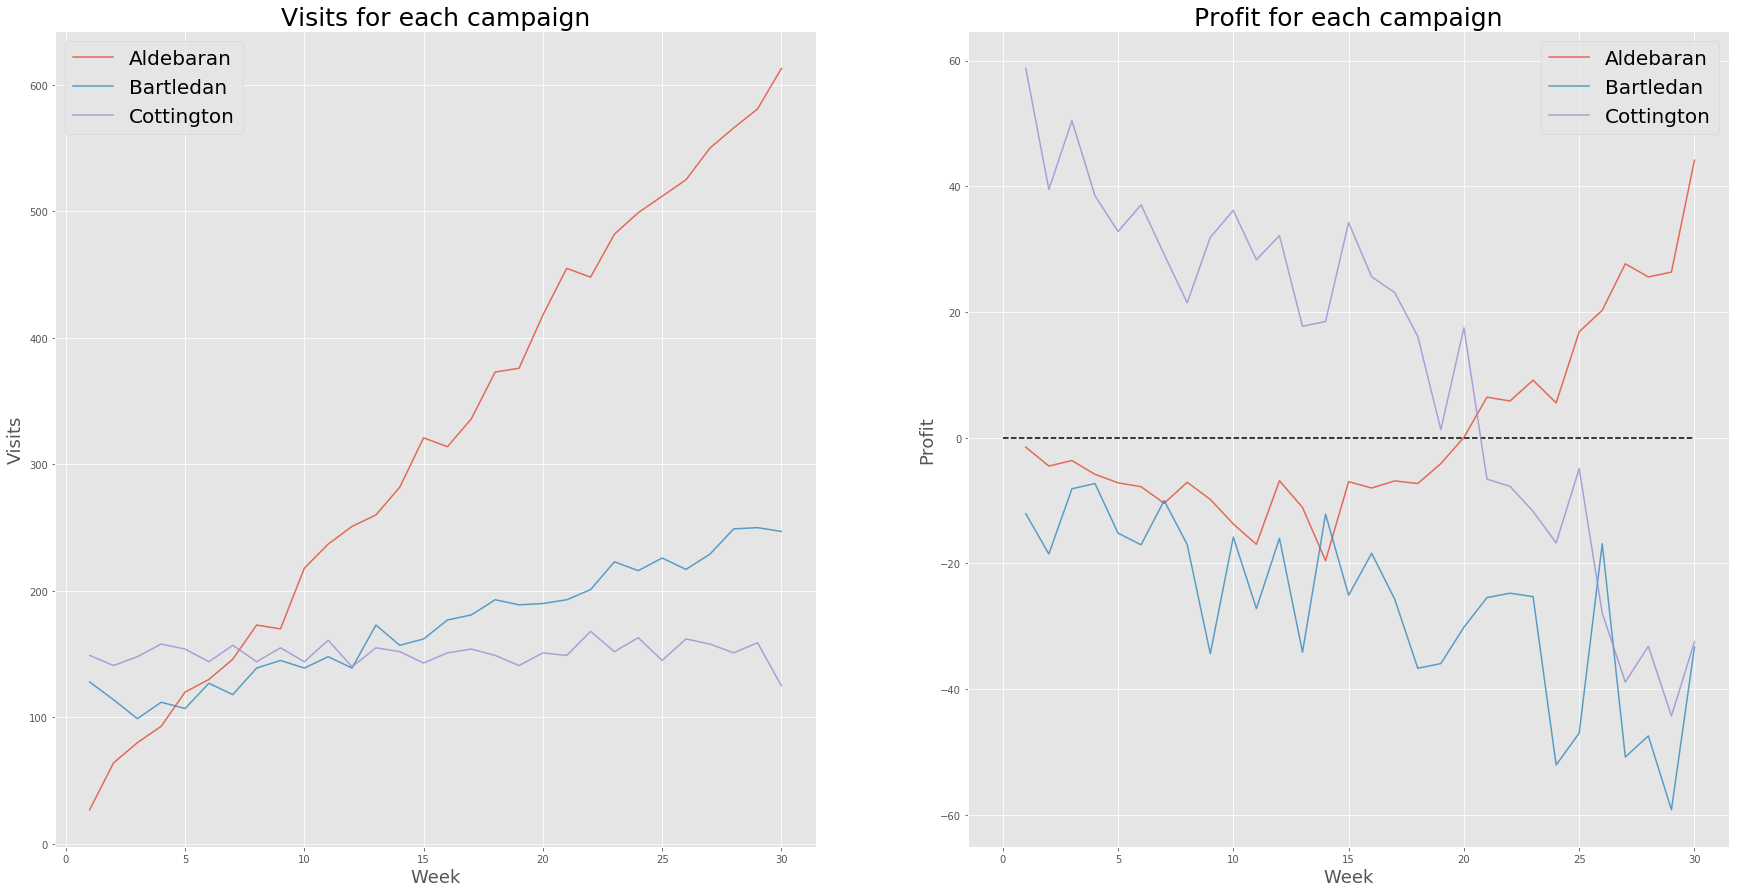

In [13]:
f, axs = plt.subplots(figsize=(30,15))

plt.subplot(121)

ax1 = plt.plot(market_campaign_Aldebaran.Week, market_campaign_Aldebaran.Visits,alpha=0.8)
ax1 = plt.plot(market_campaign_Bartledan.Week, market_campaign_Bartledan.Visits,alpha=0.8)
ax1 = plt.plot(market_campaign_Cottington.Week, market_campaign_Cottington.Visits,alpha=0.8)

ax1 = plt.legend(['Aldebaran', 'Bartledan', 'Cottington'], loc='upper left',prop={'size': 20})
ax1 = plt.xlabel('Week', fontsize=18)
ax1 = plt.ylabel('Visits', fontsize=18)
ax1 = plt.title('Visits for each campaign', fontsize=25)

plt.subplot(122)

ax2 = plt.plot(market_campaign_Aldebaran.Week, market_campaign_Aldebaran.Profit,alpha=0.8)
ax2 = plt.plot(market_campaign_Bartledan.Week, market_campaign_Bartledan.Profit,alpha=0.8)
ax2 = plt.plot(market_campaign_Cottington.Week, market_campaign_Cottington.Profit,alpha=0.8)

ax2 = plt.legend(['Aldebaran', 'Bartledan', 'Cottington'], loc='upper right',prop={'size': 20})
ax2 = plt.hlines(0,0,30,linestyles='dashed')
ax2 = plt.xlabel('Week', fontsize=18)
ax2 = plt.ylabel('Profit', fontsize=18)
ax2 = plt.title('Profit for each campaign', fontsize=25)

**I'll draw some conclusions based on the charts:**

* The amount of visit of Aldebaran grew at a stable rate, so did that of Bartledan but with a lower rate, while that of Cottington merely changed from time to time.
* Compared to the growth of visits, the growth of revenue and cost of Aldebaran are rather less
* However, compared to the growth of revenue of the other two campaigns, that of Aldebaran is considerable
* Among three campaigns, Aldebaran and Bartledan occupied the most of the growth in revenue
* Cost of each campaign all grew
* While the revenue and the amount of visit are all growing, only one-third of the time is profiting
* All of the time, Bartledan campaign is not making any profit, while Cottington campaign is only profitable in the begin, and Aldebaran campaign started to profit from Week 20

## <a id="b">b) How would you assess the development of the quality of traffic, e.g. in terms of revenue per visitor. How is the overall development and how does each campaign evolve?</a>

First, I want to have some derivative features:

* cost_per_visit as the average cost per visitor
* revenue_per_visit as the average revenue per visitor
* revenue_rate as revenue over cost
* return_rate as the return rate
* return_rate_over_visits as return rate divided by visits

### Overall, my scale for the quality of traffic is based on the [revenue_rate] column. Since the goal of marketing campaign is to bring more valuable customers, more revenue, but as less cost as possible

### I also include [return_rate_over_visits] for that I also want to consider the ratio of visits growth and return rate as extra concern

In [14]:
market_campaign['cost_per_visit']= market_campaign['Cost']/market_campaign['Visits']
# The lower the better
market_campaign['revenue_per_visit']= market_campaign['Revenue']/market_campaign['Visits']
# The higher the better
market_campaign['revenue_rate']= market_campaign['Revenue']/market_campaign['Cost']
# The higher the better
market_campaign['return_rate']= market_campaign['Profit']/market_campaign['Cost']
# If the visits grow but return rate remains, indicating the bad quality of traffic
market_campaign['return_rate_over_visits']= market_campaign['return_rate']/market_campaign['Visits']

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [15]:
# Take a look at the dataset after adding derivative features
market_campaign.head()

,Week,Campaign,Visits,Revenue,Cost,Profit,cost_per_visit,revenue_per_visit,revenue_rate,return_rate,return_rate_over_visits
0,1,Aldebaran,27,2.269511,3.763627,-1.494116,0.139394,0.084056,0.603012,-0.396988,-0.014703
1,2,Aldebaran,64,10.820403,15.322613,-4.502210,0.239416,0.169069,0.706172,-0.293828,-0.004591
2,3,Aldebaran,80,7.132998,10.753533,-3.620535,0.134419,0.089162,0.663317,-0.336683,-0.004209
3,4,Aldebaran,93,11.085813,16.906191,-5.820379,0.181787,0.119202,0.655725,-0.344275,-0.003702
4,5,Aldebaran,120,14.282481,21.446570,-7.164089,0.178721,0.119021,0.665956,-0.334044,-0.002784


In [16]:
# And the distribution
market_campaign.describe()

,Week,Visits,Revenue,Cost,Profit,cost_per_visit,revenue_per_visit,revenue_rate,return_rate,return_rate_over_visits
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,15.500000,214.788889,235.401749,239.888475,-4.486726,1.375333,1.347490,0.952442,-0.047558,-0.000526
std,8.703932,128.437498,134.127862,135.876952,25.811965,0.912242,0.926006,0.132483,0.132483,0.001813
min,1.000000,27.000000,2.269511,3.763627,-59.181714,0.134419,0.084056,0.603012,-0.396988,-0.014703
25%,8.000000,144.000000,120.761712,127.781050,-19.291879,0.344948,0.334412,0.882579,-0.117421,-0.000654
50%,15.500000,158.500000,232.090920,234.700293,-7.505886,1.463576,1.291555,0.927880,-0.072120,-0.000346
75%,23.000000,235.000000,356.154278,346.847241,17.341657,2.045965,2.239453,1.053976,0.053976,0.000234
max,30.000000,613.000000,463.249265,507.521951,58.755344,3.191962,2.913517,1.252820,0.252820,0.001697


In [17]:
#Split the dataset into three campaigns
market_campaign_Aldebaran = market_campaign.loc[market_campaign.Campaign=='Aldebaran']
market_campaign_Bartledan = market_campaign.loc[market_campaign.Campaign=='Bartledan']
market_campaign_Cottington = market_campaign.loc[market_campaign.Campaign=='Cottington']

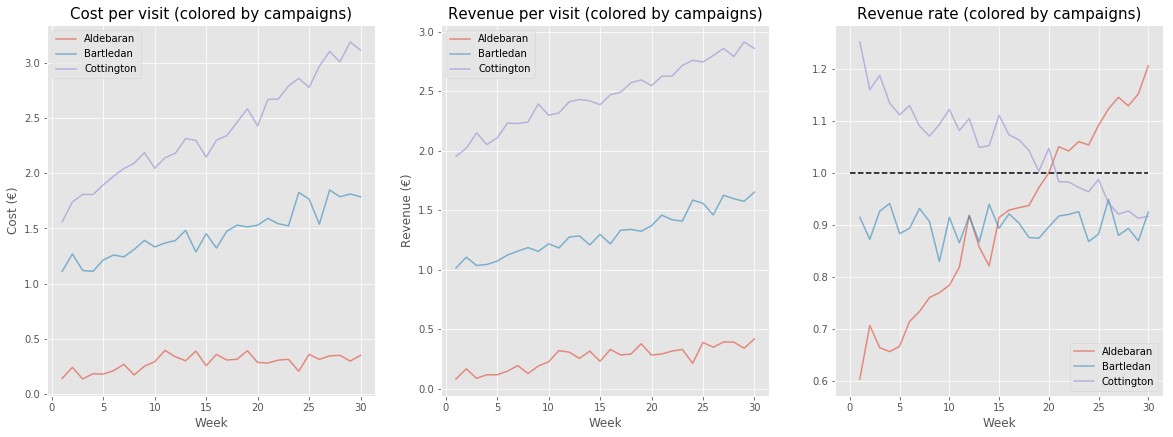

In [18]:
f, axs = plt.subplots(figsize=(20,15))

plt.subplot(231)

ax1 = plt.plot(market_campaign_Aldebaran.Week, market_campaign_Aldebaran.cost_per_visit,alpha=0.6)
ax1 = plt.plot(market_campaign_Bartledan.Week, market_campaign_Bartledan.cost_per_visit,alpha=0.6)
ax1 = plt.plot(market_campaign_Cottington.Week, market_campaign_Cottington.cost_per_visit,alpha=0.6)
ax1 = plt.legend(['Aldebaran', 'Bartledan', 'Cottington'], loc='upper left')
ax1 = plt.xlabel('Week', fontsize=12)
ax1 = plt.ylabel('Cost (€)', fontsize=12)
ax1 = plt.title('Cost per visit (colored by campaigns)', fontsize=15)

plt.subplot(232)

ax2 = plt.plot(market_campaign_Aldebaran.Week, market_campaign_Aldebaran.revenue_per_visit,alpha=0.6)
ax2 = plt.plot(market_campaign_Bartledan.Week, market_campaign_Bartledan.revenue_per_visit,alpha=0.6)
ax2 = plt.plot(market_campaign_Cottington.Week, market_campaign_Cottington.revenue_per_visit,alpha=0.6)
ax2 = plt.legend(['Aldebaran', 'Bartledan', 'Cottington'], loc='upper left')
ax2 = plt.xlabel('Week', fontsize=12)
ax2 = plt.ylabel('Revenue (€)', fontsize=12)
ax2 = plt.title('Revenue per visit (colored by campaigns)', fontsize=15)

plt.subplot(233)

ax3 = plt.plot(market_campaign_Aldebaran.Week, market_campaign_Aldebaran.revenue_rate,alpha=0.6)
ax3 = plt.plot(market_campaign_Bartledan.Week, market_campaign_Bartledan.revenue_rate,alpha=0.6)
ax3 = plt.plot(market_campaign_Cottington.Week, market_campaign_Cottington.revenue_rate,alpha=0.6)
ax3 = plt.hlines(1,0,30,linestyles='dashed')
ax3 = plt.legend(['Aldebaran', 'Bartledan', 'Cottington'], loc='lower right')
ax3 = plt.xlabel('Week', fontsize=12)
ax3 = plt.title('Revenue rate (colored by campaigns)', fontsize=15)

### Before I draw any conclusion, I want to split the assessment into two parts:

1. The goal is to get the return rate as high as possible
2. Each visit is boosting the return rate as much as possible

Text(0.5,1,'Return rate boosted by each visit (colored by campaigns)')

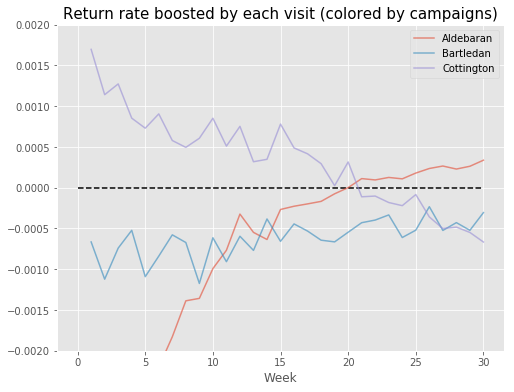

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(market_campaign_Aldebaran.Week, market_campaign_Aldebaran.return_rate_over_visits,alpha=0.6)
plt.plot(market_campaign_Bartledan.Week, market_campaign_Bartledan.return_rate_over_visits,alpha=0.6)
plt.plot(market_campaign_Cottington.Week, market_campaign_Cottington.return_rate_over_visits,alpha=0.6)
plt.hlines(0,0,30,linestyles='dashed')
plt.legend(['Aldebaran', 'Bartledan', 'Cottington'], loc='upper right')
plt.xlabel('Week', fontsize=12)
plt.ylim(-0.002,0.002)
plt.title('Return rate boosted by each visit (colored by campaigns)', fontsize=15)

### Overall,

* The cost per visit and the revenue per visit are all growing. However, the cost grew slightly more than the revenue
* The change of the revenue rate varies among campaigns. Nonetheless, since that of Aldebaran campaign grew more than the drop of the other campaigns, the good news is that the promotion is working!

### 1. The goal is to get the return rate as high as possible

#### Aldebaran campaign
* The growth of both revenue and cost are pretty stable, while revenue grows slightly more
* The revenue rate increased significantly, doubled during the period

#### Bartledan campaign
* Both revenue and cost grew linearly by 50% for each of them
* The revenue rate merely changed, stayed betweem 0.95% and 0.85%

#### Cottington campaign
* The cost grew by about 200%, while the revenue only grew by almost 150%
* Therefore, the revenue rate drop by 30%

### 2. Each visit is boosting the return rate as much as possible

**In this part, I want to add on something to those mentioned above,( I'll call the return rate boosted by each visit as boost rate)**

* The boost brought by each customer of Aldebaran campaign was bad in the begining. However, it grew fast and turned positive from Week 20
* The boost rate of Bartledan campaign is increasing gradually. Hopefully, it will keep growing and be positive in the nearly future
* The boost rate of Cottington campaign declined sharply, and eventually becoming unprofitable

## <a id="c">c)  You are talking with the responsible business developer for the market who wants to spend an additional 250€ per week from week 31 onwards. Please help him out with the following questions:</a>

* What is your advice in which campaign to invest and why?

    **I'll suggest investing Aldebaran campaign**   
    Since the return rate is the highest among three campaigns and the only positive one. Moreover, it's still growing, bringing more valuable customers, and triggering more profit.
    
* How do you expect this to impact the overall performance in the market from week 31 onwards?

    The revenue rate is about 120% in the end of week 30. Therefore, leaving the growth of return rate, we can expect that it will bring at least 300€ more revenue each week. And the cost of each visit is at most 0.5€, which indicates expected 500 more visiter each week, triggering more profit.

## <a id="t2">Task 2</a>
From our server logs, you can access the raw session data, that contains information about single visits to our website (= sessions). A clickout is logged whenever a user clicks on a hotel and is redirected to the booking page. The booking field is binary and indicates if a hotel booking was logged after one of the clickouts. Have a look at the data and check if there is any connection between the booking data and other given information. Feel free to formulate hypothesis based on your findings.

In [20]:
# Loading data
session = pd.read_csv('session_data.csv',sep=';')

In [21]:
# Overlook
session.head()

,session,session_start_text,session_end_text,clickouts,booking
0,20170503000001,06:11:53,06:15:11,3,0
1,20170503000002,21:06:41,21:08:23,3,0
2,20170503000003,12:03:01,12:06:02,3,0
3,20170503000004,05:58:00,06:02:56,0,0
4,20170503000005,09:13:43,09:17:01,1,0


In [22]:
# Take a look at the structure
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
session               10000 non-null int64
session_start_text    10000 non-null object
session_end_text      10000 non-null object
clickouts             10000 non-null int64
booking               10000 non-null int64
dtypes: int64(3), object(2)
memory usage: 390.7+ KB


Text(0.5,1,'The distribution of clickouts')

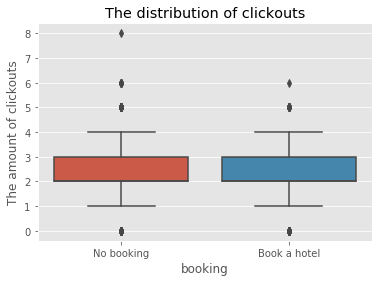

In [23]:
# Take a look at the distribution of clickouts
df = session.copy()
df['booking'] = df.booking.apply(lambda x : 'No booking' if x == 0 else 'Book a hotel')

sns.boxplot('booking','clickouts',data=df)
plt.ylabel('The amount of clickouts')
plt.title('The distribution of clickouts')

I can see that most of the amount of click are between 1 and 4. And there are some outliers. For 5, 6, and 8, I think it's normal. Some of the users do prone to browse more hotel pages than other. Since the number is not unreasonable, I'll keep them. However, the 0 clickout is unreasonable. Therefore, I'll check it out.

In [24]:
session.clickouts.value_counts()

2    3441
3    3293
4    1380
1    1352
0     293
5     229
6      11
8       1
Name: clickouts, dtype: int64

Well, since there are some amount of records with 0 clickout, I think it's those customers who straightly book a hotel or leave without click any hotel link.

And now, I want to check the distribution of booking column

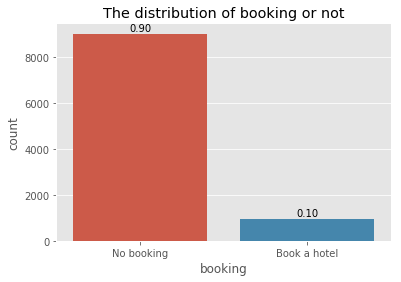

In [25]:
# Take a look at the distribution of booking
ax = sns.countplot('booking',data=df)
plt.title('The distribution of booking or not')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}'.format(height/10000),
            ha="center")

Now, we know the ratio. It's 9:1

**Before analyzing the data for the connections, I want to have some derivative features**

In [26]:
def time_calculator(x = session):
    Time_spend_list = []
    for i in range(df.shape[0]):
        Time_start_list = df['session_start_text'][i].split(':')
        start_hour = int(Time_start_list[0])
        start_minute = int(Time_start_list[1])
        start_second = int(Time_start_list[2])
        Time_end_list = df['session_end_text'][i].split(':')
        end_hour = int(Time_end_list[0])
        end_minute = int(Time_end_list[1])
        end_second = int(Time_end_list[2])
        Time_spend = 3600*(end_hour-start_hour)+60*(end_minute-start_minute)+(end_second-start_second)
        if Time_spend >= 0:
            None
        else:
            Time_spend = 86400 + Time_spend
        Time_spend_list.append(Time_spend)
    return Time_spend_list

# To record the time each session last (in seconds)
df['time_spent'] = time_calculator()

In [27]:
def part_of_day(x = session):
    Part_of_day = []
    for i in range(df.shape[0]):
        if df['session_start_text'][i] < '06:00:00':
            Part_of_day.append('Midnight')
        elif df['session_start_text'][i] < '12:00:00':
            Part_of_day.append('Morning')
        elif df['session_start_text'][i] < '18:00:00':
            Part_of_day.append('Afternoon')
        else:
            Part_of_day.append('Evening')
    return Part_of_day

# To distinguish in which part of a day the session happened
df['Part_of_the_day'] = part_of_day()

In [28]:
df.head()

,session,session_start_text,session_end_text,clickouts,booking,time_spent,Part_of_the_day
0,20170503000001,06:11:53,06:15:11,3,No booking,198,Morning
1,20170503000002,21:06:41,21:08:23,3,No booking,102,Evening
2,20170503000003,12:03:01,12:06:02,3,No booking,181,Afternoon
3,20170503000004,05:58:00,06:02:56,0,No booking,296,Midnight
4,20170503000005,09:13:43,09:17:01,1,No booking,198,Morning


In [29]:
df.describe()

,session,clickouts,time_spent
count,1.000000e+04,10000.000000,10000.000000
mean,2.017050e+13,2.485200,181.343500
std,2.886896e+03,1.060987,62.027378
min,2.017050e+13,0.000000,0.000000
25%,2.017050e+13,2.000000,139.000000
50%,2.017050e+13,2.000000,182.000000
75%,2.017050e+13,3.000000,223.000000
max,2.017050e+13,8.000000,378.000000


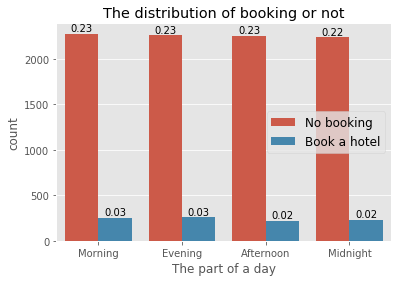

In [30]:
# Take a look at the distribution of booking
ax = sns.countplot('Part_of_the_day',data=df,hue='booking')
plt.legend(loc='right',prop={'size': 12})
plt.xlabel('The part of a day')
plt.title('The distribution of booking or not')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 25,
            '{:1.2f}'.format(height/10000),
            ha="center")

Obviously, there is no correlation between the time of session and booking or not.

Text(0.5,1,'Time spent and clickouts distribution')

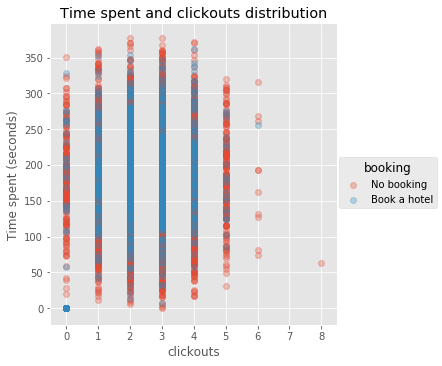

In [31]:
sns.lmplot('clickouts','time_spent',data=df, hue='booking', fit_reg=False, scatter_kws={'alpha':0.3})
plt.ylabel('Time spent (seconds)')
plt.title('Time spent and clickouts distribution')

I can see there is a circle with a high density of booking. It seems that most customers who booked a hotel will spend a certain amount of time on the website.

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [33]:
X = df[['clickouts','time_spent']]
y = df[['booking']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Create the model and assign it to the variable model.
model = SVC(kernel='rbf',gamma=5)

# Fit the model.
model.fit(X_train,y_train)
# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
print('The accuracy for the model is:', accuracy_score(y_test,y_pred))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for the model is: 0.8966666666666666


**By this way, we can build a SVM model to predict a customer will book a hotel or not since we know that there are some specific behavior patterns of the valuable customers.**

Let's Check the confusion matrix!

Text(33,0.5,'0: Booking a hotel \n 1: No Booking')

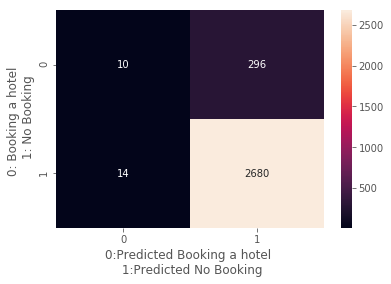

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred,labels = ['Book a hotel', 'No booking']),annot=True,fmt='2.0f')
plt.xlabel('0:Predicted Booking a hotel \n 1:Predicted No Booking')
plt.ylabel('0: Booking a hotel \n 1: No Booking')

However, we predicted correctly most of the users who won't book a hotel. In the future, we need to improve the recall of this model and find the potential customers